<a href="https://colab.research.google.com/github/josepalaci0/Palacio/blob/main/RedesNeuronalesReglaDelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programando una red neuronal en Python**

vamos a crear una clase, que llamaremos capa. Además, vamos a inicializar los parámetros (b y W) con datos aleatorios. Para esto último usaremos la función trunconorm de la librería stats, ya que nos permite crear datos aleatorios dado un rango, media y desviación estándar, lo cual hará que a nuestra red le cueste menos arrancar.

In [2]:
from scipy import stats

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

**Función de activación: Función Sigmoide**

La función sigmoide básicamente recibe un valor x y devuelve un valor entre 0 y 1. Esto hace que sea una función muy interesante, ya que indica la probabilidad de un estado. Por ejemplo, si usamos la función sigmoide en la última capa para un problema de clasificación entre dos clases, la función devolverá la probabilidad de pertenencia a un grupo.

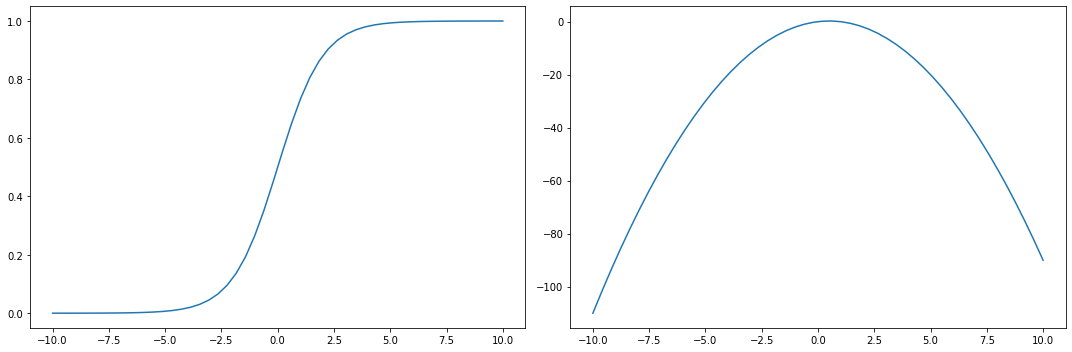

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

**Función de activación: Función ReLu**

La función ReLu es muy simple: para valores negativos, la función devuelve cero. Para valores positivos, la función devuelve el mismo valor. Pero, a pesar de ser tan simple, esta función es la función de activación más usada en el campo de las redes neuronales y deep learning. ¿El motivo? Pues precisamente porque es sencilla y porque evita el gradient vanish

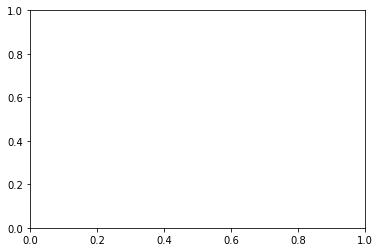

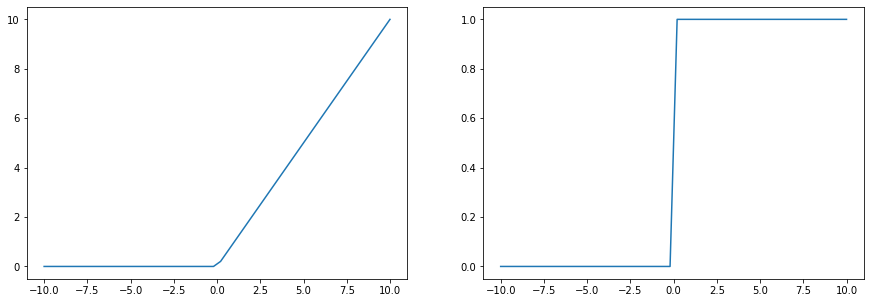

In [4]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

**Ejemplo de Red nuronal**

Para crear una red neuronal, simplemente tendremos que indicar tres cosas: el número de capas que tiene la red, el número de neuronas en cada capa y la función de activación que se usará en cada una de las capas. Con eso y con lo que hemos programado hasta ahora ya podemos crear la estructura de nuestra red neuronal.

En nuestro caso, usaremos la red neuronal para solucionar un problema de clasificación de dos clases, para lo cual usaremos una red pequeña, de 4 capas que se compondrá de:

Una capa de entrada con dos neuronas, ya que usaremos dos variables.
Dos capas ocultas, una de 4 neuronas y otra de 8.
Una capa de salida, con una única neurona que predecirá la clase.
Asimismo, tenemos que definir qué función de activación se usará en cada capa. En nuestro caso, usaremos la función ReLu en todas las capas menos en la última, en la cual usaremos la función sigmoide. Es importante recordar que en la primera capa solo se reciben los datos, no se aplica una función ni nada.

Por otro lado, Python no permite crear una lista de funciones. Por eso, hemos definido las funciones relu y sigmoid como funciones ocultas usando lambda.

In [6]:
# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

# Funciones de activacion usadas en cada capa. 
funciones_activacion = [relu,relu, sigmoid]

Con todo esto, ya podemos crear la estructura de nuestra red neuronal programada en Python. Lo haremos de forma iterativa e iremos guardando esta estructura en un nuevo objeto, llamado

In [8]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)


[<__main__.capa object at 0x7efdae16d790>, <__main__.capa object at 0x7efdae16d750>, <__main__.capa object at 0x7efdae16d190>]


Con esto ya tenemos la estructura de nuestra red neuronal. Ahora solo quedarían dos pasos más: por un lado, conectar la red para que nos de una predicción y un error y, por el otro lado, ir propagando ese error hacia atrás para ir entrenando a nuestra red neuronal.

**Haciendo que nuestra red neuronal prediga**

Para que nuestra red neuronal prediga lo único que tenemos que hacer es definir los cáculos que tiene que seguir. Como he comentado anterirormente, son 3 los cálculos a seguir: multiplicar los valores de entrada por la matriz de pesos W y sumar el parámetro bias (b) y aplicar la función de activación.

Para multiplicar los valores de entrada por la matriz de pesos tenemos que hacer una multiplicación matricial. Veamos el ejemplo de la primera capa

In [9]:
X =  np.round(np.random.randn(20,2),3) # Ejemplo de vector de entrada

z = X @ red_neuronal[0].W

print(z[:10,:], X.shape, z.shape)

[[ 0.09139   0.208068  0.283221 -0.081046]
 [-0.345254 -0.330468 -1.153953 -0.261298]
 [ 0.12984   0.059311  0.445947  0.179193]
 [-0.341896 -0.123312 -1.180332 -0.512792]
 [ 0.192568  0.061199  0.666327  0.299105]
 [ 0.182162  0.27917   0.589521  0.007312]
 [-0.158994 -0.253094 -0.512805  0.005364]
 [ 0.514402  0.388556  1.738443  0.51863 ]
 [-0.014024 -0.126787 -0.025971  0.130595]
 [-0.19336  -0.156627 -0.651519 -0.181781]] (20, 2) (20, 4)


Ahora, hay que sumar el parámetro bias (b) al resultado anterior de z.

In [10]:
z = z + red_neuronal[0].b

print(z[:5,:])

[[ 0.20639  -0.408932  0.969221 -0.795046]
 [-0.230254 -0.947468 -0.467953 -0.975298]
 [ 0.24484  -0.557689  1.131947 -0.534807]
 [-0.226896 -0.740312 -0.494332 -1.226792]
 [ 0.307568 -0.555801  1.352327 -0.414895]]


Ahora, habría que aplicar la función de activación de esa capa.

In [11]:
a = red_neuronal[0].funcion_act[0](z)
a[:5,:]

array([[ 0.20639 , -0.      ,  0.969221, -0.      ],
       [-0.      , -0.      , -0.      , -0.      ],
       [ 0.24484 , -0.      ,  1.131947, -0.      ],
       [-0.      , -0.      , -0.      , -0.      ],
       [ 0.307568, -0.      ,  1.352327, -0.      ]])

Con esto, tendríamos el resultado de la primera capa, que a su vez es la entrada para la segunda capa y así hasta la última. Por tanto, queda bastante claro que todo esto lo podemos definir de forma iterativa dentro de un bucle

In [12]:
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])

[[0.33355352]
 [0.42430121]
 [0.32424432]
 [0.42430121]
 [0.31184174]
 [0.31611922]
 [0.39177198]
 [0.25543296]
 [0.35164617]
 [0.41628767]
 [0.42430121]
 [0.35930801]
 [0.42430121]
 [0.35055001]
 [0.41326536]
 [0.30835531]
 [0.42430121]
 [0.3054868 ]
 [0.34550707]
 [0.28683516]]


Así, tendríamos la estimación para cada una de las clases de este ejercicio de prueba. Como es la primera ronda, la red no ha entrenado nada, por lo que el resultado es aleatorio. Por tanto, solo quedaría una cosa: entrenar a nuestra red neuronal programada en Python.

**Creando la función de coste**

Para poder entrenar la red neuronal lo primero que debemos hacer es calcular cuánto ha fallado. Para ello usaremos uno de los estimadores más típicos en el mundo del machine learning: el error cuadrático medio (MSE).

Calcular el error cuadrático medio es algo bastante simple: a cada valor predicho le restas el valor real, lo elevas al cuadrado, haces la suma ponderada y calculas su raíz. Además, como hemos hecho anteriormente aprovecharemos para que esta misma función nos devuelva la derivada dela función de coste, la cual nos será útil en el paso de backpropagation. 

In [13]:
def mse(Ypredich, Yreal):

  # Calculamos el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # Calculamos la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

Con esto, vamos a «inventarnos» unas clases (0 o 1) para los valores que nuestra red neuronal ha predicho antes. Así, calcularemos el error cuadrático medio. 

In [14]:
from random import shuffle

Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)

mse(output[-1], Y)[0]

0.25233556459711515

Ahora que ya tenemos el error calculado, tenemos que irlo propagando hacia atrás para ir ajustando los parámetros. Haciendo esto de forma iterativa, nuestra red neuronal irá mejorando sus predicciones, es decir, disminuirá su error. Vamos, que así es como se entrena a una red neuronal.

**Gradient descent: optimizando los parámetros**

Con el algoritmo de gradient descent optimizaremos los parámetros para así ir mejorando los resultados de nuestra red. Si volvemos atrás, los parámetros los hemos inicializado de forma aleatoria. Por eso, eso poco probable que sus valores sean los mejores para nuestra red neuronal. Supongamos, por ejemplo, que nuestros parámetros se han inicializado en esta posición.


[Imagen de explicacion 01](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_500/https://anderfernandez.com/wp-content/uploads/2020/05/Gradient-Descent-Gif-Paso1.png)


Como véis, los valores están lejos del valor óptimo (el azul oscuro más abajo), por lo que deberíamos hacer que nuestro parámetro llegue a allí. Pero, ¿cómo lo hacemos?

Para ello, usaremos gradient descent. Este algoritmo utiliza el error en el punto en el que nos encontramos y calcula las derivadas parciales en dicho punto. Esto nos devuelve el vector gradiente, es decir, un vector de direcciones hacia donde el error se incrementa. Por tanto, si usamos el inverso de ese valor, iremos hacia abajo. En definitiva, gradient descent calcula la inversa del gradiente para saber qué valores deben tomar los hiperparámetros.

Cuánto nos movamos hacia abajo dependerá de otro hiperparámetro: el learning rate. Este hiperparámetro no se suele optimizar, aunque si que hay que tener en cuenta dos cuestiones:

Si el valor del learning rate es muy bajo, el algoritmo tardará en aprender, porque cada paso será muy corto.
Si el learning rate es muy grande, puede que te pases del valor óptimo, por lo que no llegues a encontrar el valor óptimo de los parámetros.
Para evitar esto se pueden aplicar varias técnicas, como la de disminuir el learning rate a cada paso que demos, por ejemplo. En nuestro caso, no nos vamos a complicar y dejaremos un learning rate fijo.

Con gradient descent a cada iteración nuestros parámetros se irán acercando a un valor óptimo, hasta que lleguen a un punto óptimo, a partir del cual nuestra red dejará de aprender.

[Imagen explicacion 02](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_500,h_288/https://anderfernandez.com/wp-content/uploads/2020/05/Gradient-Descent-Gif.gif)






**Backpropagation: calculando el error en cada capa**

En nuestra red neuronal todos los pasos previos a la neurona de salida tendrán un impacto en el mismo: el error de la primera capa influirá en el error de la segunda capa, los de la primera y segunda influirán en los de la tercera y así sucesivamente.

Por tanto, la única manera de calcular el error de cada neurona en cada capa es haciendo el proceso inverso: primero calculamos el error de la última capa, con lo que podremos calcular el error de la capa anterior y así hasta completar todo el proceso.

Además, este es un proceso eficiente, ya que podemos aprovechar la propagación hacia atrás para ir ajustando los parámetros W y b mediante gradient descent. En cualquier caso, para calcular el descenso del gradiente necesitamos aplicar derivadas, entre las que se encuentra las derivadas de la función de coste. Por eso mismo, al definir las funciones de activación hemos definido también sus derivadas, ya que eso nos ahorrará mucho el proceso.

Dicho esto, veamos cómo funcionan gradient descent y backpropagation. Para ello,vamos a ver qué valores tienen inicialmente nuestros parámetros W y b en una capa cualquiera, como por ejemplo la última. 

In [15]:
red_neuronal[-1].b
red_neuronal[-1].W

array([[ 0.884],
       [-0.127],
       [ 0.431],
       [-0.873],
       [-0.623],
       [ 0.521],
       [ 0.694],
       [-0.563]])

Como desconocemos el valor óptimo de estos parámetros, los hemos inicializado de forma aleatoria. Por tanto, en cada ronda estos valores se irán cambiando pooco a poco. Para ello, lo primero que debemos hacer es transmitir el error hacia atrás. Como estamos trabajando de atrás hacia adelante (o de derecha a izquierda si visualizamos la red), partiremos de la última capa e iremos hacia adelante.

El error lo calculamos como la derivada de la función de coste sobre el resultado de la capa siguiente por la derivada de la función de activación. En nuestro caso, el resultado del último valor está en la capa -1, mientras que la capa que vamos a optimizar es la anteúltima (posición -2). Además, como hemos definido las funciones como un par de funciones, simplemente tendremos que indicar el resultado de la función en la posición [1] en ambos casos

In [16]:
# Backprop en la ultima capa
a = output[-1]
x = mse(a,Y)[1] * red_neuronal[-2].funcion_act[1](a)

x

array([[-0.66644648],
       [-0.57569879],
       [ 0.32424432],
       [-0.57569879],
       [ 0.31184174],
       [-0.68388078],
       [-0.60822802],
       [ 0.25543296],
       [ 0.35164617],
       [-0.58371233],
       [ 0.42430121],
       [ 0.35930801],
       [ 0.42430121],
       [ 0.35055001],
       [-0.58673464],
       [-0.69164469],
       [-0.57569879],
       [ 0.3054868 ],
       [-0.65449293],
       [ 0.28683516]])

Si hiciéramos esto en cada capa, iríamos propagando el error generado por la estimación de la red neuronal. Sin embargo, propagar el error por si mismo no hace nada, sino que ahora tenemos que usar ese error para optimizar los valores de los parámetros mediante gradient descent. Para ello, tenemos calcular las derivadas en el punto de los parámetros b y W y restar esos valores a los valores anteriores de b y W

In [17]:
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01

red_neuronal[-1].b
red_neuronal[-1].W

array([[ 0.91208289],
       [-0.09891711],
       [ 0.45908289],
       [-0.84491711],
       [-0.59491711],
       [ 0.54908289],
       [ 0.72208289],
       [-0.53491711]])

Con esto ya habríamos actualizado los parámetros de W y b en la última capa. Ahora bien, para calcular el error de la siguiente capa tendríamos que multiplicar matricialmente el error de esta capa (x) por los pesos de la misma, para así saber cuánto de ese error corresponde a cada neurona de la capa. Pero claro, ya hemos actualizado los pesos, por lo que eso fastidiaría el aprendizaje, ¿no?

Efectivamente, eso nos generaría un problema y tendríamos que esperar una iteración más para aplicar cambios. Sin embargo, tiene solución y muy fácil. Para evitar ese problema lo que hacemos es guardar los valores de W antes de actualizar en una variable «temporal», que en mi caso he llamado W_temp. De esta manera, somos capaces de calcular el error correspondiente a cada neurona y actualizar los valores de los parámetros todo en una misma iteración.

Si ponemos todo esto junto, la fórmula de backpropagation y gradient descent queda de la siguiente maner

In [18]:
# Definimos el learning rate
lr = 0.05

# Creamos el indice inverso para ir de derecha a izquierda
back = list(range(len(output)-1))
back.reverse()

# Creamos el vector delta donde meteremos los errores en cada capa
delta = []

for capa in back:
  # Backprop #

  # Guardamos los resultados de la ultima capa antes de usar backprop para poder usarlas en gradient descent
  a = output[capa+1][1]

  # Backprop en la ultima capa 
  if capa == back[0]:
    x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backprop en el resto de capas 
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Guardamos los valores de W para poder usarlos en la iteracion siguiente
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # Ajustamos los valores de los parametros de la capa
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

MSE: 0.5
Estimacion: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Con esto ya tendríamos aplicado backpropagation y gradient descent. Así que, ¿qué te parece ver cómo funciona nuestra red neuronal programada en Python con un caso práctico

**Definición del problema: clasificación de puntos**

Vamos a poner a prueba a nuestra red con un problema bastante sencillo: clasificar puntos de dos nubes de puntos. Para ello, lo primero que vamos a hacer es crear una función que nos devuelva puntos aleatorios al rededor de un círculo imaginario de radio R

In [19]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #Vamos a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

Ahora, crearemos dos sets de datos aleatorios, cada uno de 150 puntos y con radios diferentes. La idea de hacer que los datos se creen de forma aleatoria es que puedan solaparse, de tal manera que a la red neuronal le cueste un poco y el resultado no sea perfecto

In [20]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

Con esto ya tendríamos nuestros datos de entrada (X) y sus correspondientes etiquetas (Y). Teniendo esto en cuenta, visualicemos cómo es el problema que debe resolver nuestra red neuronal:

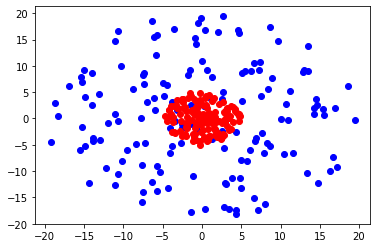

In [21]:
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()


**Entrenamiento de nuestra red neuronal**

Lo primero de todo, vamos a crear funciones a partir del código que hemos generado anteriormente. Esto nos facilitirará las cosas.

In [22]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Incluimos el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Guardaremos el error de la capa en delta  
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

¡Ya tenemos nuestra función de red neuronal funcionando! Ahora, simplemente tenemos que indicar los los parámetros y el número de rondas y esperar para ver cómo va aprendiendo nuestra red neuronal y cómo de bien se le da con el problema que hemos planteado. ¡Vamos a ello!

Para ello, volvemos a crear la clase neurona y definir nuestra red neuronal, para así reinicializar todo y no depender del código escrito anteriormente. 

In [23]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1] 
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)  

Ahora que ya tenemos la red entrenada, vamos a usar la función de entrenamiento. Además, vamos a ir guardando tanto las predicciones que hace como el error que está cometiendo. De esta manera podremos visualizar cómo ha entrenado nuestra red.

In [28]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = mse(np.round(predicciones[-1]),Y)[0]
  error.append(temp)

Ningún error, así que parece que todo ha ido bien. Vamos a ver cómo ha mejorado el error de la red en cada iteración:

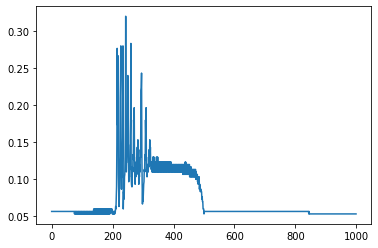

In [29]:
epoch = list(range(0,1000))
plt.plot(epoch, error)

¡Nuestra red neuronal ha entrenado! De hecho, nuestra red neuronal programada en Python a partido de un error del 0.5, es decir, un respuesta completamente aleatoria, a un error de tan solo 0.12 en el último epoch.

De hecho vemos que desde el epoch 900 la red neuronal no ha mejorado su resultado. Esto se debe a que sus parámetros ya están optimizados, por lo que no puede aprender más.

**Conclusión**

Hay que decir que, independientemente si eres de R o Python, en ningún caso cuando trabajes con redes neuronales tendrás que programar una red neuronal desde 0 como hemos hecho aquí. Seguramente, usarás librerías como Tensorflow y Keras, como hicimos en los posts de .

Sin duda alguna programar una red neuronal en Python desde 0 te ayuda a afianzar los conceptos de las redes neuronales y a tener que pelearte con Python y descubrir formas eficientes de hacer las cosas.

En mi caso, para hacer este post he partido del post que hice de cómo programar una red neuronal en R desde 0. Ahora que he trabajado tanto con R como con Python, sin duda alguna veo que ambos tienen cosas buenas y otras… no tanto.

Por ejemplo, programar una red neuronal desde 0 en Python es más sencillo debido a la propia sintaxis del lenguaje, ya que en R, al trabajar con listas, había mucho corchete y era un poco complicado. Además, los temas más puros de programación, como la creación de una clase, está mucho más desarrollado en Python que en R.

Sin embargo, por otro lado, trabajar con matrices en R me ha sido bastante más sencillo que hacerlo en Python. Esto es normal, ya que al fin y al cabo R se basa en matrices y vectores y Python… pues Numpy sí, pero lo demás no.